In [2]:
import pandas as pd 

In [3]:
df=pd.read_csv("insurance.csv") 
df.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [4]:
# column names
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [5]:
# data type of columns
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [6]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
# missing values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

 There is no null values in the given Dataframe.

# Univariate analysis

### Non Viz  
Min  
Max    
Central Tendency  
Percentiles  
Dispersion  
### Viz
Plot of Dist- Distribution  
Plot of box plot - Outlier

## Analysing Age Column -Univariate

In [8]:
# age(column)- numerical

In [27]:
# Non-vizualisation  analysis
print("min of age:",df['age'].min())
print("max of age:",df['age'].max())
print("mean of age:",df['age'].mean())
print("median of age:",df['age'].median())
print("standard deviation of age:",df["age"].std())

min of age: 18
max of age: 64
mean of age: 39.20702541106129
median of age: 39.0
standard deviation of age: 14.049960379216172


<AxesSubplot:ylabel='Density'>

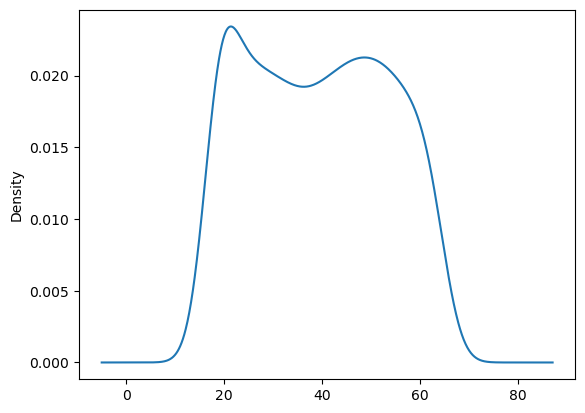

In [15]:
# plot for distribution of age column
df['age'].plot(kind='kde')

<AxesSubplot:>

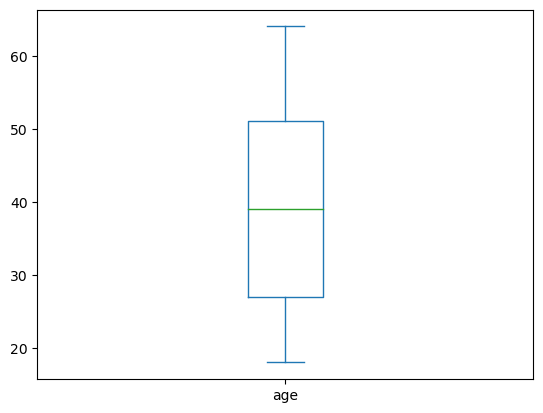

In [16]:
# detecting outliers in age column using box column
df["age"].plot(kind="box") 

In [17]:
from scipy import stats
import matplotlib.pyplot as plt

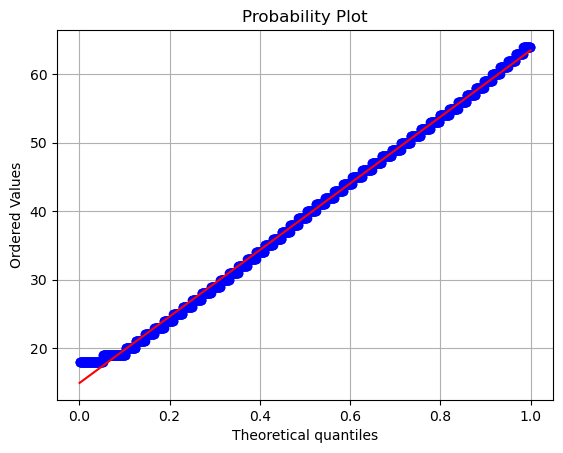

In [22]:
# checking for uniform distribution
stats.probplot(df['age'],dist="uniform",plot=plt)
plt.grid()

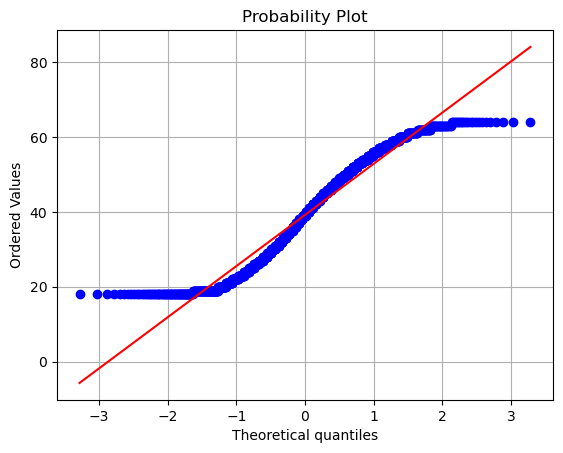

In [24]:
# checking for normal distribution
stats.probplot(df['age'],dist="norm",plot=plt)
plt.grid()

- Age column follows uniform distribution.

## Analysing bmi Column -Univariate

In [28]:
# Non vizulaisation statistical Analysis
print("min of bmi:",df["bmi"].min())
print("max of bmi:",df["bmi"].max())
print("mean of bmi:",df["bmi"].mean())
print("median of bmi:",df["bmi"].median())
print("standard deviation of bmi:",df["bmi"].std())

min of bmi: 15.96
max of bmi: 53.13
mean of bmi: 30.663396860986538
median of bmi: 30.4
standard deviation of bmi: 6.098186911679017


<AxesSubplot:ylabel='Density'>

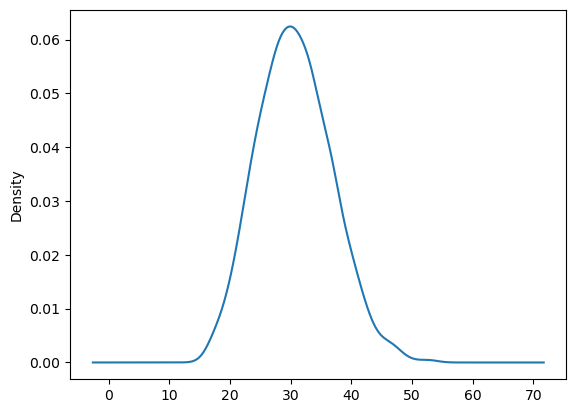

In [44]:
# plotting the distribution for bmi column
df["bmi"].plot(kind="kde")  

<AxesSubplot:>

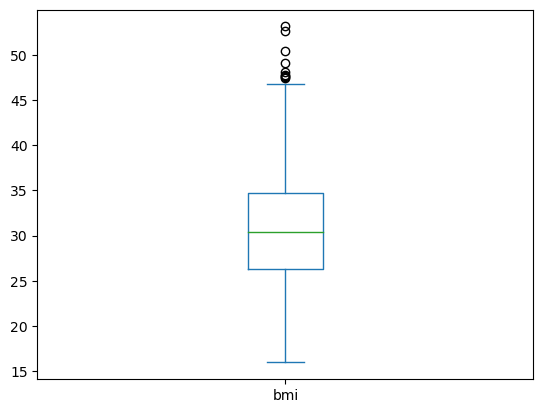

In [32]:
# detecting outliers in bmi column using box column
df["bmi"].plot(kind="box")  

- There are some outliers in the bmi column

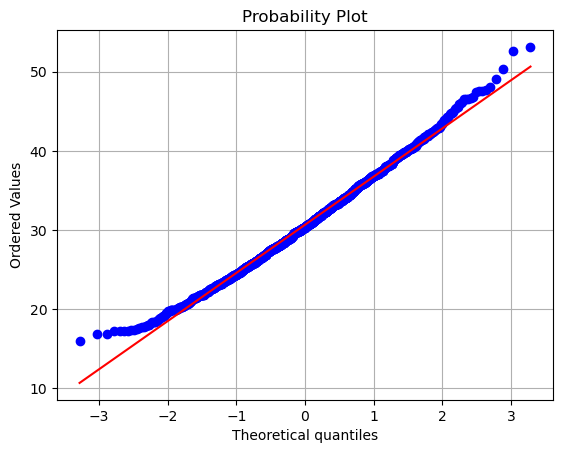

In [33]:
# QQ plot for bmi column to check which type of distribution it follows
stats.probplot(df["bmi"],dist="norm",plot=plt)
plt.grid() 

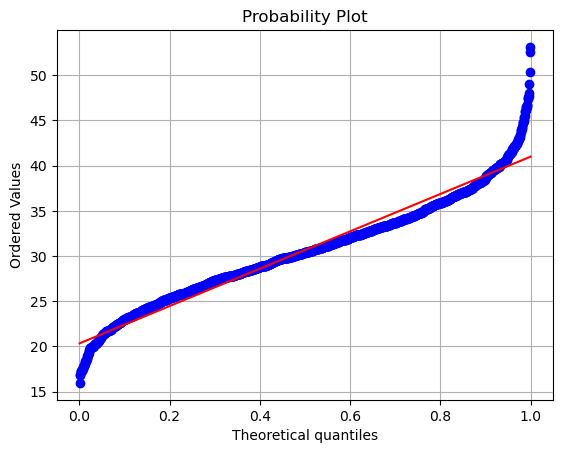

In [34]:
# QQ plot for bmi column to check which type of distribution it follows
stats.probplot(df["bmi"],dist="uniform",plot=plt)
plt.grid() 

 - Treating outliers using IQR method

In [36]:
# removing outliers using IQR
bmi_q1 = df["bmi"].quantile(0.25)
bmi_q3 = df["bmi"].quantile(0.75)

IQR = bmi_q3 - bmi_q1
bmi_lower_bound = bmi_q1 - 1.5* IQR
bmi_upper_bound = bmi_q3 + 1.5* IQR

clean_df = df[(df["bmi"]>bmi_lower_bound) & (df["bmi"]<bmi_upper_bound)] 

In [37]:
# checking no.of columns after removing outliers
clean_df.shape

(1329, 7)

<AxesSubplot:ylabel='Density'>

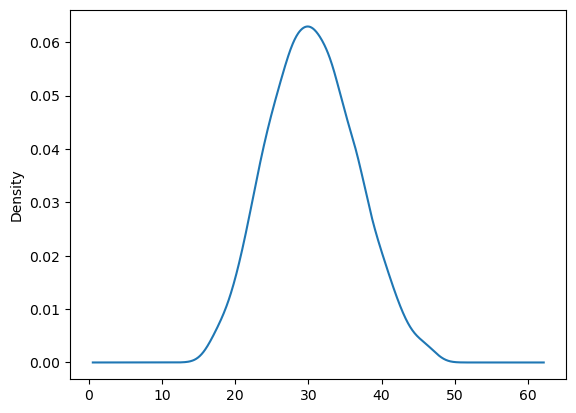

In [38]:
# The distribution plot for bmi column after removing outliers
clean_df["bmi"].plot(kind="kde") 

<AxesSubplot:>

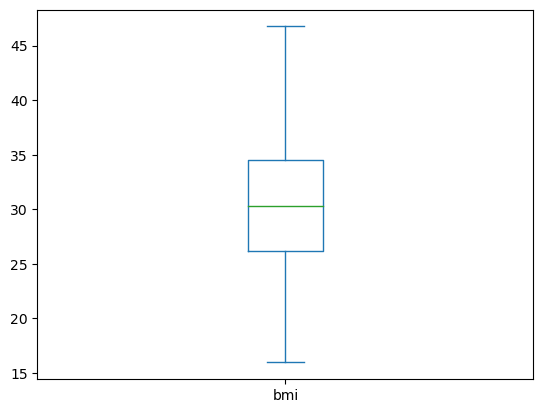

In [41]:
# checking whether outliers is there or not after using IQR method.
clean_df['bmi'].plot(kind='box') 

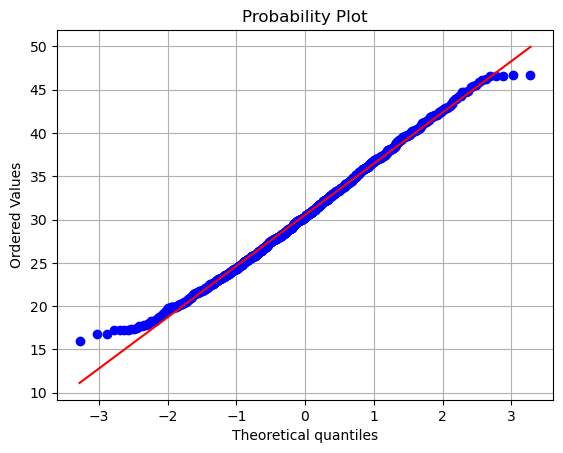

In [42]:
# QQ plot after removing outliers for bmi column
stats.probplot(clean_df["bmi"],dist="norm",plot=plt)
plt.grid() 

- bmi column doesn't follows normal distribution after removing outliers.Even though mean,median or almost same

## Analysing children Column -Univariate

In [43]:
# Non visulaization analysis for children colum
print("min of childern:",df["children"].min())
print("max of childern:",df["children"].max())
print("mean of childern:",df["children"].mean())
print("median of childern:",df["children"].median())
print("std of childern:",df["children"].std())

min of childern: 0
max of childern: 5
mean of childern: 1.0949177877429
median of childern: 1.0
std of childern: 1.2054927397819095


<AxesSubplot:ylabel='Density'>

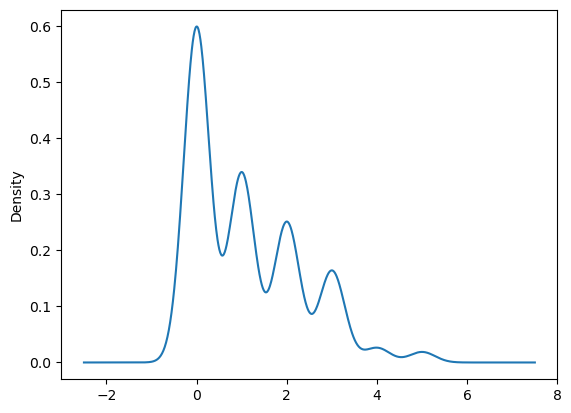

In [45]:
# distribution plot for chidren column
df["children"].plot(kind = "kde") 

<AxesSubplot:>

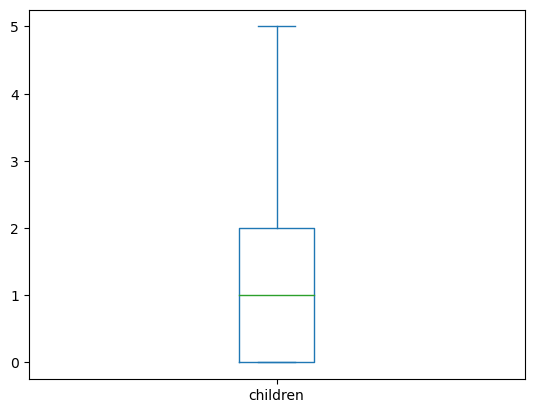

In [46]:
# checking outliers in the children column using box plot
df["children"].plot(kind = "box")  

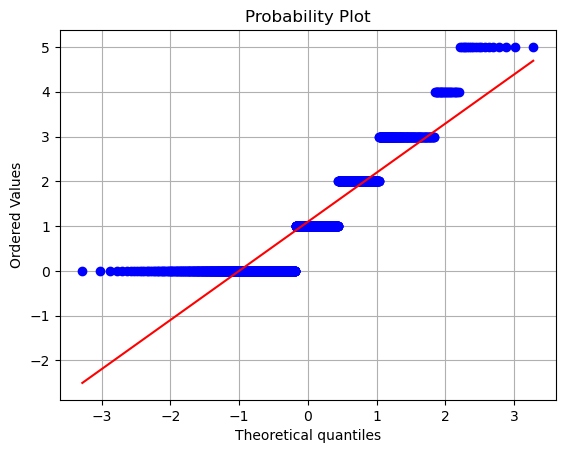

In [47]:
# QQ plot for children column 
stats.probplot(df["children"],dist="norm",plot=plt)
plt.grid() 

- children column does not follows normal distribution.Even though mean and median are same

## Analysing charges column-Univarite 

In [48]:
# Non visulaization analysis for charges column
print("min of charges:",df["charges"].min())
print("max of charges:",df["charges"].max())
print("mean of charges:",df["charges"].mean())
print("median of charges:",df["charges"].median())
print("standard deviation of charges:",df["charges"].std()) 

min of charges: 1121.8739
max of charges: 63770.42801
mean of charges: 13270.422265141257
median of charges: 9382.033
standard deviation of charges: 12110.011236693994


<AxesSubplot:ylabel='Density'>

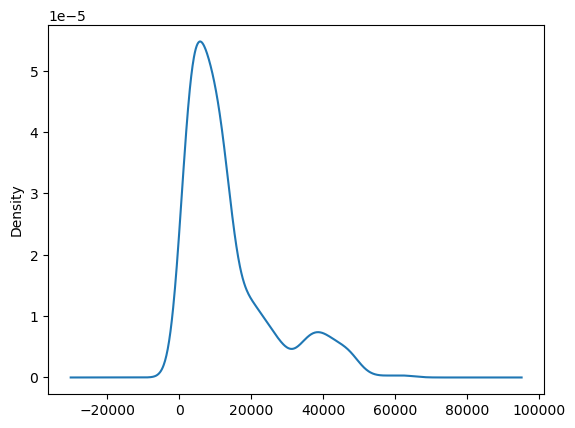

In [49]:
# Distribution plot for charges column
df["charges"].plot(kind="kde") 

- As there are more outliers, The distribution of charges feature follows pareto distribution.

<AxesSubplot:>

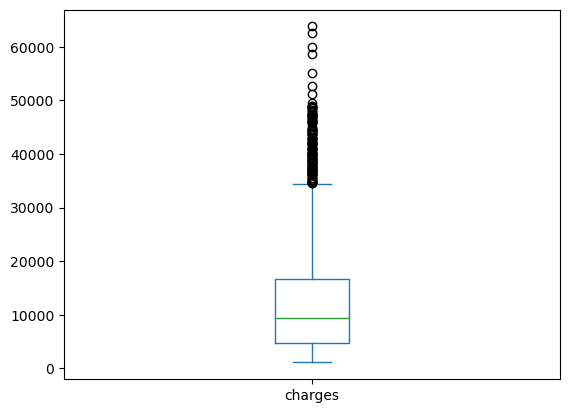

In [50]:
# Box plot for charges column 
df["charges"].plot(kind="box") 

- There are more Outliers in the charges column.  
But we cannot remove them because `"charges"`is the targete variable in the given dataframe.

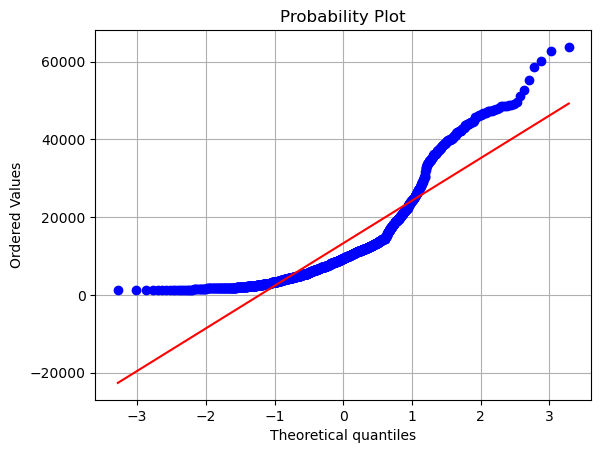

In [51]:
# QQ plot for charges column 
stats.probplot(df["charges"],dist="norm",plot=plt)
plt.grid() 

## Analysing sex column-Univariate 

In [52]:
# getting column names
clean_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [53]:
# getting value counts
clean_df['sex'].value_counts() 

male      670
female    659
Name: sex, dtype: int64

In [54]:
# getting value_counts by normalization.
clean_df['sex'].value_counts(normalize=True)

male      0.504138
female    0.495862
Name: sex, dtype: float64

<AxesSubplot:>

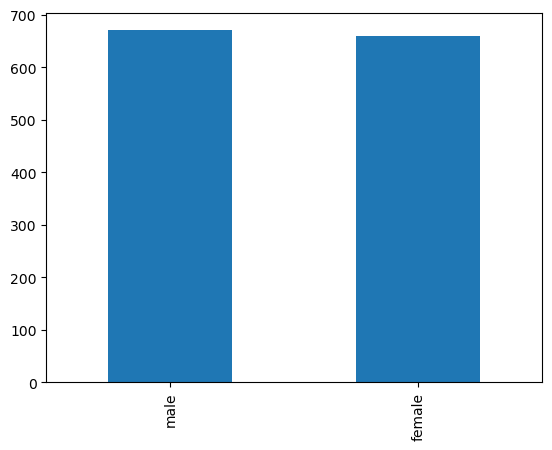

In [56]:
# bar plot for sex column
clean_df['sex'].value_counts().plot(kind="bar")  

## Analysing region column-Univariate 

In [58]:
# Non visualization for region column
clean_df['region'].value_counts() 

southeast    357
northwest    325
southwest    324
northeast    323
Name: region, dtype: int64

In [59]:
# applying value counts by normalization 
clean_df['region'].value_counts(normalize = True)

southeast    0.268623
northwest    0.244545
southwest    0.243792
northeast    0.243040
Name: region, dtype: float64

<AxesSubplot:>

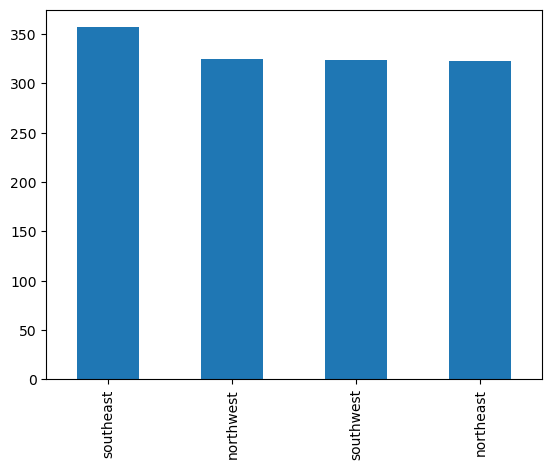

In [60]:
# bar  plot for region column
clean_df['region'].value_counts().plot(kind="bar") 

## Analysing smoker column-Univariate

In [61]:
# applying value counts for smoker feature
clean_df['smoker'].value_counts() 

no     1058
yes     271
Name: smoker, dtype: int64

In [62]:
# applying value counts by normalization
clean_df['smoker'].value_counts(normalize = True) 

no     0.796087
yes    0.203913
Name: smoker, dtype: float64

<AxesSubplot:>

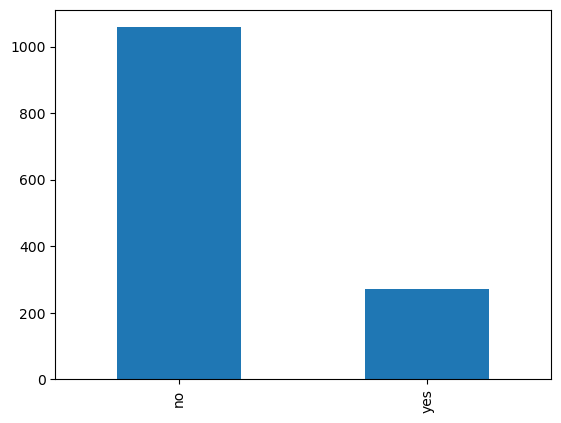

In [63]:
# plotting bar plot for smoker region
clean_df['smoker'].value_counts().plot(kind="bar")  

# Bivariate Analysis
## Analysing relationship between Numerical features
## Relationship between Age and Charges

In [64]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

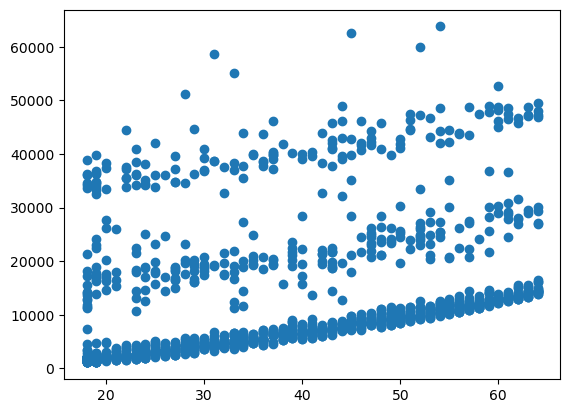

In [65]:
# Analising relationship between age and charges column using scatter plot(NUM vs NUM)
# Before cleaning the data
plt.scatter(x=df["age"],y=df["charges"])

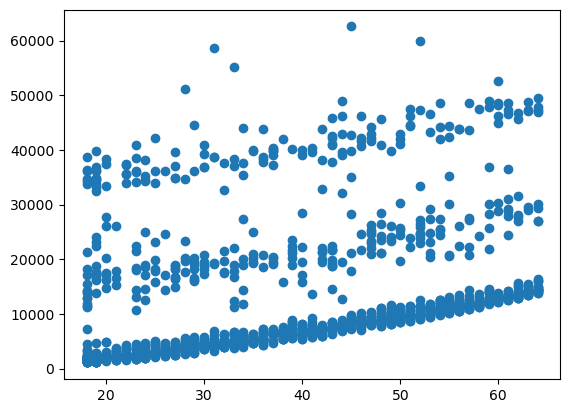

In [66]:
# After cleaning the data
plt.scatter(x=clean_df["age"],y=clean_df["charges"])

-  As the age increases the charges will be impacted more.
-So,there is a Positive relationship between age and charges.

## Analysing relationship between bmi-body mass index vs charges

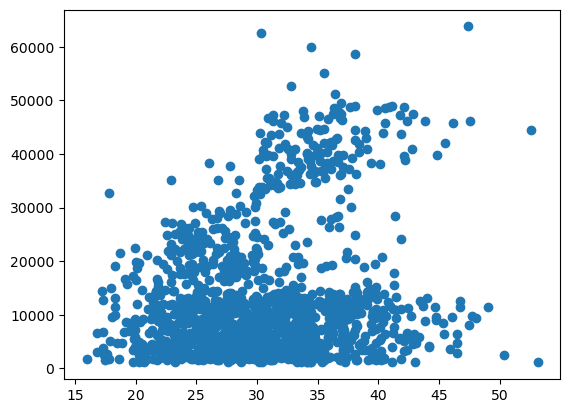

In [67]:
# Analysing relationship between bmi and charges (NUM vs NUM)
# Before cleaning data
plt.scatter(x=df["bmi"],y=df["charges"])

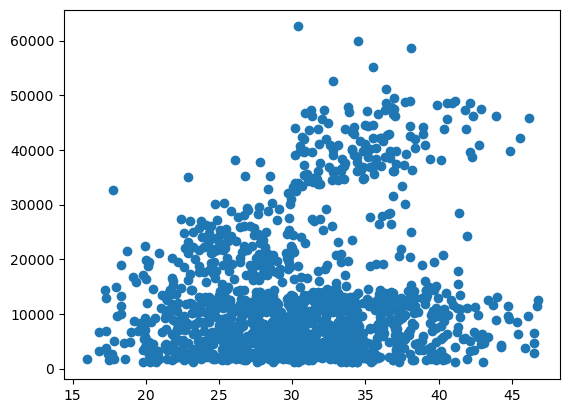

In [68]:
# After cleaning the data
plt.scatter(x=clean_df["bmi"],y=clean_df["charges"]) 

- There is no relationship between Bmi column and charges feature.

## Analysing relationship between childern and charges

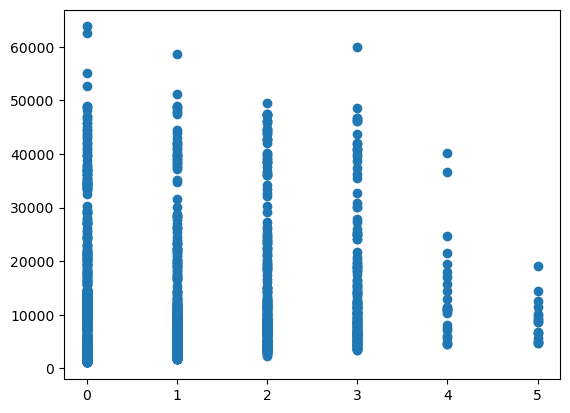

In [69]:
# Analysing  relationship between children and charges 
# Before deleting data
plt.scatter(x=df["children"],y=df["charges"])

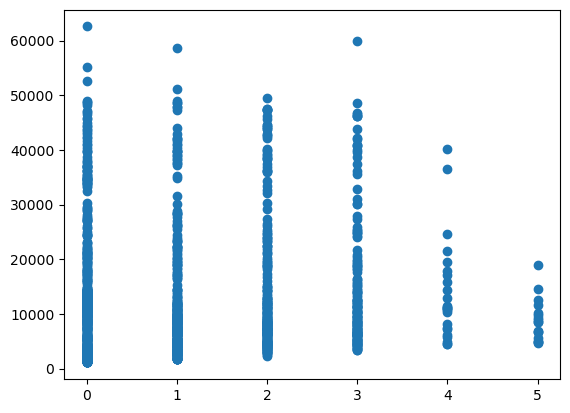

In [70]:
# After deleting the data
plt.scatter(x=clean_df["children"],y=clean_df["charges"])

- There is no relationshipn between children and charges feature.

# Analysing relationship between categorical columns
## Analysing relationship between sex and charges

<AxesSubplot:title={'center':'charges'}, xlabel='sex'>

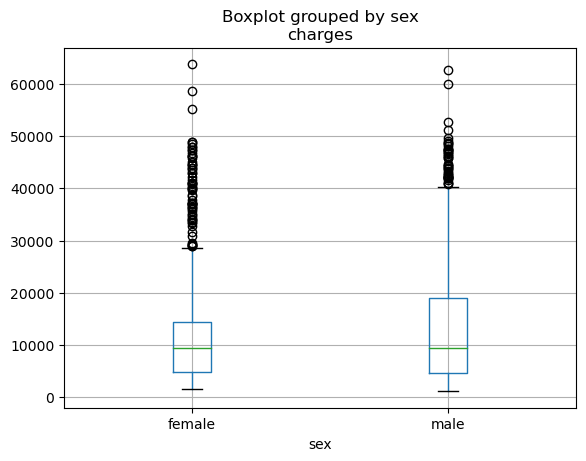

In [71]:
# applying box plot for sex and charges features 
# Before cleaning the data
df.boxplot(by="sex",column="charges")

<AxesSubplot:title={'center':'charges'}, xlabel='sex'>

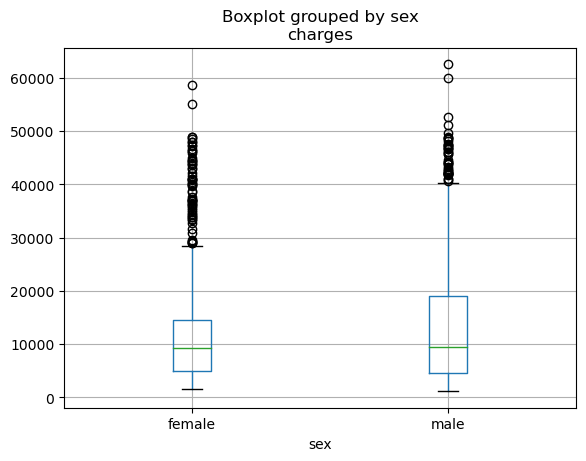

In [72]:
# after cleaning the data
clean_df.boxplot(by="sex",column="charges")

- There is no relationship between sex and charges

## Analysing realtionship between smoker vs charges

<AxesSubplot:title={'center':'charges'}, xlabel='smoker'>

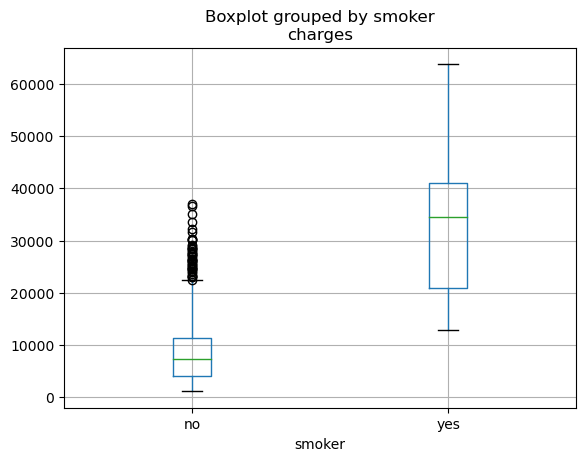

In [73]:
# plotting box plot for smoker and charges feature
df.boxplot(by="smoker",column="charges")

- There is large impact on charges feature if smoker = Yes
- There is relationship between smoker and charges feature.

## Analysing realtionship between region vs charges

<AxesSubplot:title={'center':'charges'}, xlabel='region'>

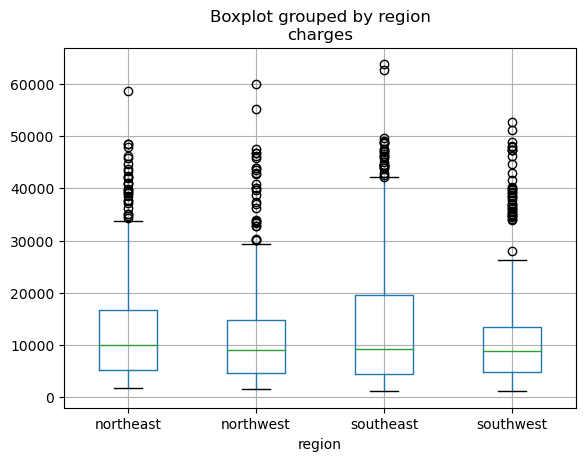

In [75]:
# Analysing relation between region and charges column using box plot
# before cleaning the data
df.boxplot(by="region",column="charges")

- There is no realtion between region and charges column.
- but comparing other regions  southeast region having impact on charges column.

# Insights
 1.`Age`: There is a positive correlation between age and medical charges, indicating that older individuals tend to have higher healthcare expenses.  
2.`BMI`:There is no significant relationship between BMI and medical charges, suggesting that BMI alone may not be a strong predictor of healthcare costs.    
3.`Smoker`:  Smokers have higher medical charges compared to non-smokers, highlighting the impact of smoking on healthcare expenses.  
4.`Children`: The number of children does not appear to have a significant effect on medical charges.  
5.`Region`: There are no clear regional variations in medical charges based on the given dataset.

# conclusion

- **Develop age-specific insurance plans and offer preventive health screenings for older individuals.**

- **Promote wellness programs for healthy lifestyles, but BMI does not directly impact charges.**  
- **Provide smoking cessation support and consider smoker-specific insurance plans.** 

- **Customize coverage plans to include pediatric and maternity benefits for families.**

- **Assess regional healthcare trends, but no major regional variations were found.**

# Recommendations



- Create age-specific insurance plans and offer targeted preventive health screenings.  
- Promote wellness programs for healthy lifestyles and weight management.  
- Provide smoking cessation support and consider smoker-specific insurance plans.  
- Develop comprehensive coverage for pediatric care and maternity-related benefits.  
- Assess regional healthcare trends and collaborate with local providers.